In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

plt.style.use('ggplot')

In [4]:
df = pd.read_csv('Data/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [6]:
print(df.shape)

(568454, 10)


In [7]:
df = df.head(5000)
df.shape

(5000, 10)

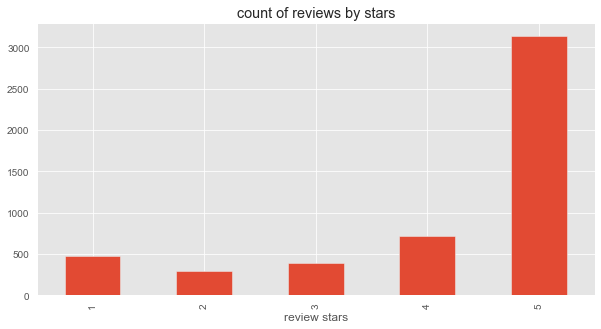

In [8]:
## EDA
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar', title='count of reviews by stars',figsize= (10,5))
ax.set_xlabel('review stars')
plt.show()



Basic NLTK

In [9]:
example = df['Text'][55]
print(example)

We roast these in a large cast iron pan on the grill (about 1/3 of the bag at a time).  The smell is wonderful and the roasted beans taste delicious too.  More importantly, the coffee is smooth; no bitter aftertaste.  On numerous occasions, we've had to send the roasted beans home with friends because they like it so much.


In [10]:

tokens = nltk.word_tokenize(example)
print(tokens)

['We', 'roast', 'these', 'in', 'a', 'large', 'cast', 'iron', 'pan', 'on', 'the', 'grill', '(', 'about', '1/3', 'of', 'the', 'bag', 'at', 'a', 'time', ')', '.', 'The', 'smell', 'is', 'wonderful', 'and', 'the', 'roasted', 'beans', 'taste', 'delicious', 'too', '.', 'More', 'importantly', ',', 'the', 'coffee', 'is', 'smooth', ';', 'no', 'bitter', 'aftertaste', '.', 'On', 'numerous', 'occasions', ',', 'we', "'ve", 'had', 'to', 'send', 'the', 'roasted', 'beans', 'home', 'with', 'friends', 'because', 'they', 'like', 'it', 'so', 'much', '.']


In [11]:
tagged = nltk.pos_tag(tokens)
print(tagged)

[('We', 'PRP'), ('roast', 'VBP'), ('these', 'DT'), ('in', 'IN'), ('a', 'DT'), ('large', 'JJ'), ('cast', 'NN'), ('iron', 'NN'), ('pan', 'NN'), ('on', 'IN'), ('the', 'DT'), ('grill', 'NN'), ('(', '('), ('about', 'IN'), ('1/3', 'CD'), ('of', 'IN'), ('the', 'DT'), ('bag', 'NN'), ('at', 'IN'), ('a', 'DT'), ('time', 'NN'), (')', ')'), ('.', '.'), ('The', 'DT'), ('smell', 'NN'), ('is', 'VBZ'), ('wonderful', 'JJ'), ('and', 'CC'), ('the', 'DT'), ('roasted', 'JJ'), ('beans', 'NNS'), ('taste', 'VBP'), ('delicious', 'JJ'), ('too', 'RB'), ('.', '.'), ('More', 'RBR'), ('importantly', 'RB'), (',', ','), ('the', 'DT'), ('coffee', 'NN'), ('is', 'VBZ'), ('smooth', 'JJ'), (';', ':'), ('no', 'DT'), ('bitter', 'JJ'), ('aftertaste', 'NN'), ('.', '.'), ('On', 'IN'), ('numerous', 'JJ'), ('occasions', 'NNS'), (',', ','), ('we', 'PRP'), ("'ve", 'VBP'), ('had', 'VBN'), ('to', 'TO'), ('send', 'VB'), ('the', 'DT'), ('roasted', 'JJ'), ('beans', 'NNS'), ('home', 'NN'), ('with', 'IN'), ('friends', 'NNS'), ('because',

In [12]:
#chunked into a sentance
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  We/PRP
  roast/VBP
  these/DT
  in/IN
  a/DT
  large/JJ
  cast/NN
  iron/NN
  pan/NN
  on/IN
  the/DT
  grill/NN
  (/(
  about/IN
  1/3/CD
  of/IN
  the/DT
  bag/NN
  at/IN
  a/DT
  time/NN
  )/)
  ./.
  The/DT
  smell/NN
  is/VBZ
  wonderful/JJ
  and/CC
  the/DT
  roasted/JJ
  beans/NNS
  taste/VBP
  delicious/JJ
  too/RB
  ./.
  More/RBR
  importantly/RB
  ,/,
  the/DT
  coffee/NN
  is/VBZ
  smooth/JJ
  ;/:
  no/DT
  bitter/JJ
  aftertaste/NN
  ./.
  On/IN
  numerous/JJ
  occasions/NNS
  ,/,
  we/PRP
  've/VBP
  had/VBN
  to/TO
  send/VB
  the/DT
  roasted/JJ
  beans/NNS
  home/NN
  with/IN
  friends/NNS
  because/IN
  they/PRP
  like/VBP
  it/PRP
  so/RB
  much/RB
  ./.)


Step 1 : VADER Sentiment Scoring

"Bag of Words " Approach :
- Stop words are removed
- Each work is scored and combined to a total score


In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [14]:
sia = SentimentIntensityAnalyzer()


In [19]:
sia.polarity_scores('I am NOT VERY happy')

{'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'compound': -0.58}

In [20]:
sia.polarity_scores(example)

{'neg': 0.071, 'neu': 0.708, 'pos': 0.221, 'compound': 0.8908}

In [28]:
#Run the polarity scores entire data set
#tqdm -> Progress bar in python
res = {}
for i,r in tqdm(df.iterrows(),total=len(df)):
    txt = r['Text']
    id = r['Id']
    res[id] = sia.polarity_scores(txt)




  0%|          | 0/5000 [00:00<?, ?it/s]

In [29]:
vaders = pd.DataFrame(res).T

In [30]:
vaders = vaders.reset_index().rename(columns={'index' : 'Id'})
vaders

,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
4995,4996,0.025,0.883,0.092,0.7193
4996,4997,0.026,0.764,0.210,0.9846
4997,4998,0.097,0.827,0.076,-0.0554
4998,4999,0.154,0.637,0.209,0.9078


In [31]:
vaders = vaders.merge(df,how = 'left')
#we have sentiment score and meta data for each reviews
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,0.025,0.883,0.092,0.7193,B00653KJ5M,AGE64SY3HP9RV,CZ,1,1,2,1341273600,The cavemen must have been wealthy,I really wanted to like these.<br /><br />Firs...
4996,4997,0.026,0.764,0.210,0.9846,B00653KJ5M,A1MPEPNJ2NKWM,Rachel Albert Matesz,1,1,1,1341100800,These cookies need work; you can make your own...,I was not impressed with these cookies when I ...
4997,4998,0.097,0.827,0.076,-0.0554,B00653KJ5M,A1T6I625FGQS20,IL,1,1,3,1336694400,Okay in a pinch - not great,The cookies came sealed and seem to be high qu...
4998,4999,0.154,0.637,0.209,0.9078,B00653KJ5M,A3POAWC2JPQQQP,me,0,0,4,1342137600,"they are good (except for the ""rainforest"" fla...","These taste very good, but aren't like the BES..."


#Now we assume that if the score of the item the reviewer gave is 5 then its positive and 1 is negative review
#VADER RESULTS

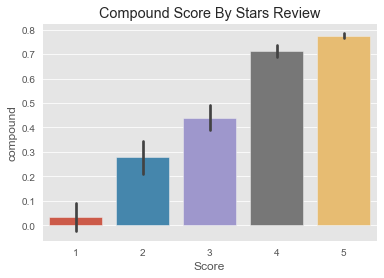

In [33]:
ax = sns.barplot(data = vaders, x = 'Score', y = 'compound')
ax.set_title('Compound Score By Stars Review')
plt.show()

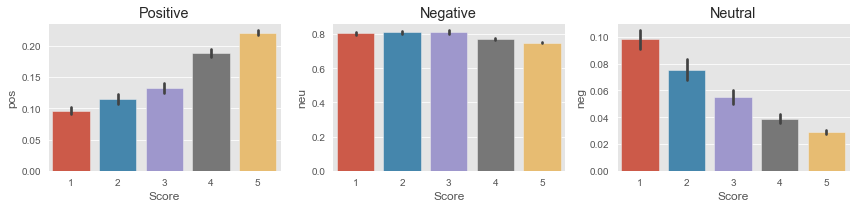

In [43]:
fig, axs = plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=vaders, x = 'Score', y = 'pos', ax =axs[0])
sns.barplot(data=vaders,x = 'Score', y = 'neu', ax=axs[1])
sns.barplot(data=vaders,x = 'Score', y = 'neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Negative')
axs[2].set_title('Neutral')
plt.tight_layout()
plt.show()
#Here scores increase as star value increases for positive